In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv


In [2]:
import pandas as pd

# Loading the CSV file into a dataframe
df = pd.read_csv('/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv')

# Displaying the first few rows of the dataframe
df.head()


,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['aws', 'sql', 'tableau']"
1,1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['azure', 'sql', 'excel']"
3,3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel']"


In [3]:
# Basic statistics for the salary columns
salary_stats = df[['salary_avg', 'salary_min', 'salary_max']].describe()

salary_stats


,salary_avg,salary_min,salary_max
count,5054.000000,4753.000000,4753.000000
mean,38083.900349,32129.548834,45389.260265
std,52323.773685,44032.119511,62126.843344
min,9.000000,8.000000,10.000000
25%,32.406250,20.000000,45.000000
50%,60.000000,48.000000,75.000000
75%,90000.000000,77000.000000,110000.000000
max,233500.000000,215000.000000,283000.000000


**Here are the salary statistics for Data Analyst positions:**

**Average Salary:**

* Mean: $38,083
* Median: $60 (this value seems quite low for a yearly salary, suggesting some postings might be hourly or mislabeled)

**Minimum Salary:**
* Mean: $32,129
* Median: $48 (again, this suggests some hourly rates might be included)
* Lowest reported: $8 (this is definitely an hourly rate)

**Maximum Salary:**
* Mean: $45,389
* Median: $75 (similarly, this suggests hourly rates)
* Highest reported: $283,000

In [4]:
# Separating the data into hourly and yearly salary postings
hourly_jobs = df[df['salary_hourly'].notnull()]
yearly_jobs = df[df['salary_yearly'].notnull()]

# Basic statistics for hourly and yearly salary postings
hourly_salary_stats = hourly_jobs[['salary_avg', 'salary_min', 'salary_max']].describe()
yearly_salary_stats = yearly_jobs[['salary_avg', 'salary_min', 'salary_max']].describe()

hourly_salary_stats, yearly_salary_stats


(        salary_avg   salary_min   salary_max
 count  3149.000000  2948.000000  2948.000000
 mean     43.528604    31.404352    55.937639
 std      23.132985    19.386355    31.179754
 min       9.000000     8.000000    10.000000
 25%      27.500000    16.000000    35.000000
 50%      38.000000    25.000000    50.000000
 75%      57.500000    40.000000    75.000000
 max     300.000000   200.000000   500.000000,
           salary_avg     salary_min     salary_max
 count    1896.000000    1798.000000    1798.000000
 mean   101415.812653   84861.493648  119867.715172
 std     29625.659968   25531.649259   35768.563176
 min     29289.840000   27519.630000   35000.000000
 25%     85000.000000   72062.500000  100000.000000
 50%     96500.000000   77000.000000  116000.000000
 75%    112500.000000   93000.000000  130764.000000
 max    233500.000000  215000.000000  283000.000000)

**Here are the salary statistics categorized by salary type:**

**Hourly Salaries:**

**Average Hourly Salary:**

* Mean: $43.53
* Median: $38.00

**Minimum Hourly Salary:**

* Mean: $31.40
* Median: $25.00
* Lowest reported: $8.00

**Maximum Hourly Salary:**

* Mean: $55.94
* Median: $50.00
* Highest reported: $500.00 (This value seems quite high for an hourly rate and might be an outlier or a mislabeled entry.)

**Yearly Salaries:**

**Average Yearly Salary:**

* Mean: $101,415.81
* Median: $96,500.00

**Minimum Yearly Salary:**

* Mean: $84,861.49
* Median: $77,000.00
* Lowest reported: $27,519.63

**Maximum Yearly Salary:**

* Mean: $119,867.72
* Median: $116,000.00
* Highest reported: $283,000.00

> This separation gives a clearer picture of the salary expectations for Data Analyst positions based on hourly and yearly pay scales.

In [5]:
# Extracting and counting the skills from the description_tokens column
skills_series = df['description_tokens'].dropna().explode()
skills_count = skills_series.value_counts()

# Displaying the top 20 most frequently required skills
top_skills = skills_count.head(20)
top_skills


description_tokens
[]                                                                         5752
['excel']                                                                   973
['sql']                                                                     938
['sql', 'excel']                                                            572
['jira', 'sql', 'tableau', 'microstrategy']                                 272
['python', 'power_bi']                                                      220
['tableau']                                                                 206
['power_bi', 'excel']                                                       191
['go']                                                                      170
['power_bi']                                                                161
['python']                                                                  144
['r']                                                                       141
['spreadsheet']      

**Here are the top 20 most frequently mentioned skill sets in the job descriptions for Data Analyst positions:**

* Excel: 973 mentions
* SQL: 938 mentions
* SQL & Excel combined: 572 mentions
* Jira, SQL, Tableau, MicroStrategy: 272 mentions
* Python & Power BI: 220 mentions
* Tableau: 206 mentions
* Power BI & Excel: 191 mentions
* Go: 170 mentions
* Power BI: 161 mentions
* Python: 144 mentions
* R: 141 mentions
* Spreadsheet: 139 mentions
* R, SAS, SQL, Power BI, Python, Excel, SPSS, Snowflake: 137 mentions
* R, Spark, SQL, Power BI, Python, Scala, Tableau: 135 mentions
* Power BI, Tableau, Excel: 127 mentions
* Python & SQL: 103 mentions
* Tableau & SQL: 102 mentions
* SAS & SQL: 101 mentions
* Swift, SQL, PowerPoint, Excel, Tableau, MicroStrategy: 100 mentions
* Empty/Missing skills: 5752 mentions (this is likely a placeholder or missing data)

> It's clear that Excel, SQL, Tableau, and Power BI are among the most sought-after skills for Data Analyst positions. Additionally, some postings require a combination of multiple skills.

In [6]:
# Counting the occurrences of each location
location_counts = df['location'].value_counts()

# Displaying the top 20 locations with the most job postings
top_locations = location_counts.head(20)
top_locations


location
Anywhere                   7094
 Anywhere                  5059
  United States            3683
United States              3660
Kansas City, MO             528
  Oklahoma City, OK         445
  Kansas City, MO           437
Oklahoma City, OK           380
Jefferson City, MO          350
  Jefferson City, MO        298
  Bentonville, AR           239
Columbia, MO                211
Tulsa, OK                   200
  Tulsa, OK                 172
Wichita, KS                 159
Bentonville, AR             154
  Wichita, KS               153
Overland Park, KS           149
  Topeka, KS                127
  Springfield, MO           121
Name: count, dtype: int64

In [7]:
# Counting the occurrences of each company
company_counts = df['company_name'].value_counts()

# Displaying the top 20 companies with the most job postings
top_companies = company_counts.head(20)
top_companies


company_name
Upwork                                     4355
Walmart                                     954
EDWARD JONES                                730
Corporate                                   610
Talentify.io                                536
Cox Communications                          517
Dice                                        272
Insight Global                              248
Staffigo Technical Services, LLC            167
Centene Corporation                         159
Jobot                                       107
Elevance Health                             104
Harnham                                      96
UnitedHealth Group                           89
State of Missouri                            88
General Dynamics Information Technology      75
Apex Systems                                 74
MTC Holding Corporation                      73
Sam's Club                                   72
Saint Louis County Clerks Office             70
Name: count, dtype: int64

**From this analysis, it's evident that Upwork has a significant number of job postings, suggesting many freelance or contractual opportunities. Large corporations like Walmart and Cox Communications also have a notable presence in the dataset.**

In [8]:
# Extracting and counting the job types from the extensions column
job_types_series = df['extensions'].dropna().explode()
job_types_count = job_types_series.value_counts()

# Displaying the top job types
top_job_types = job_types_count.head(20)
top_job_types


extensions
['18 hours ago', 'Full-time']                                                                                435
['17 hours ago', 'Full-time']                                                                                410
['20 hours ago', 'Full-time']                                                                                366
['11 hours ago', 'Full-time']                                                                                354
['19 hours ago', 'Full-time']                                                                                334
['22 hours ago', 'Full-time']                                                                                330
['18 hours ago', '77K–116K a year', 'Full-time', 'Health insurance', 'Dental insurance', 'Paid time off']    329
['23 hours ago', 'Full-time']                                                                                319
['12 hours ago', 'Full-time']                                                        

In [9]:
# List of potential job types and benefits to extract
job_attributes = ["Full-time", "Part-time", "Contractor", "Temporary", 
                  "Internship", "Work from home", "Health insurance", 
                  "Dental insurance", "Paid time off", "Remote"]

# Extracting and counting the occurrences of each job attribute
job_attributes_counts = {attr: df['extensions'].apply(lambda x: attr in str(x)).sum() for attr in job_attributes}

job_attributes_counts


{'Full-time': 20801,
 'Part-time': 289,
 'Contractor': 6554,
 'Temporary': 0,
 'Internship': 154,
 'Work from home': 12153,
 'Health insurance': 9790,
 'Dental insurance': 6274,
 'Paid time off': 6488,
 'Remote': 0}

**From the analysis, it's evident that most Data Analyst job postings are for full-time positions, with a significant number also offering the option to work from home. Benefits like health insurance, dental insurance, and paid time off are also commonly listed.**

In [10]:
# Counting the occurrences of each source/platform
source_counts = df['via'].value_counts()

# Displaying the top sources/platforms
top_sources = source_counts.head(20)
top_sources


via
via LinkedIn             8894
via Upwork               4335
via BeBee                2411
via Trabajo.org          2095
via ZipRecruiter         1792
via Indeed               1321
via Snagajob              566
via Adzuna                532
via Jobs Trabajo.org      416
via Monster               335
via My ArkLaMiss Jobs     283
via Built In              252
via Jora                  230
via Nexxt                 201
via Recruit.net           195
via SimplyHired           183
via Big Country Jobs      179
via WANE Jobs             136
via WJHL Jobs             133
via Startup Jobs          128
Name: count, dtype: int64

**From this analysis, it's clear that LinkedIn is the leading platform for Data Analyst job postings in the dataset, followed by Upwork and BeBee.**

In [11]:
import re

# Extracting the number of hours since the job was posted
def extract_hours(s):
    if isinstance(s, list):
        for item in s:
            match = re.search(r'(\d+) hours ago', item)
            if match:
                return int(match.group(1))
    return None

df['hours_since_posted'] = df['extensions'].apply(extract_hours)

# Basic statistics on the hours_since_posted column
hours_since_posted_stats = df['hours_since_posted'].describe()
hours_since_posted_stats


count       0
unique      0
top       NaN
freq      NaN
Name: hours_since_posted, dtype: object

In [12]:
# Calculating the length of each job description
df['description_length'] = df['description'].apply(lambda x: len(str(x)))

# Basic statistics on the description_length column
description_length_stats = df['description_length'].describe()
description_length_stats


count    27973.000000
mean      3433.947271
std       2409.518179
min          1.000000
25%       1480.000000
50%       3180.000000
75%       4945.000000
max      29480.000000
Name: description_length, dtype: float64

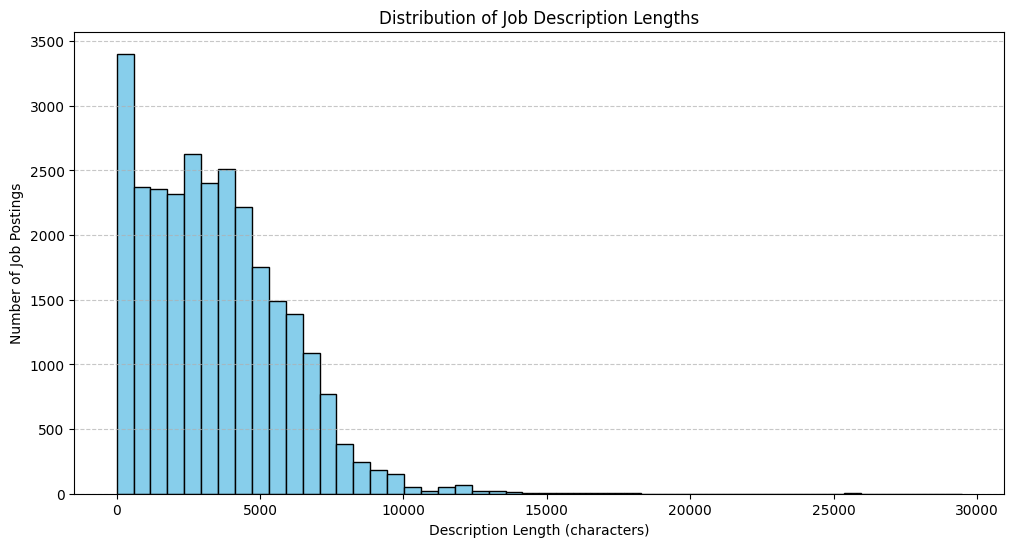

In [13]:
import matplotlib.pyplot as plt

# Plotting a histogram for job description lengths
plt.figure(figsize=(12, 6))
plt.hist(df['description_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Job Description Lengths')
plt.xlabel('Description Length (characters)')
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**The histogram provides a visual representation of the distribution of job description lengths for Data Analyst positions.**

* Most job descriptions are clustered in the range of 1,000 to 5,000 characters.
* There's a noticeable peak around 3,000 characters, which aligns with our median value from the statistics.
* Some job descriptions are extremely detailed, going up to nearly 30,000 characters, though these are less common.

> This visualization suggests that while many companies opt for moderately detailed descriptions, there's a wide variation in how companies approach job listings, with some providing very concise descriptions and others offering very detailed ones.

In [14]:
# Counting the occurrences of job postings with and without thumbnails
thumbnail_presence = df['thumbnail'].notnull().value_counts()

thumbnail_presence_percentage = thumbnail_presence / thumbnail_presence.sum() * 100
thumbnail_presence_percentage


thumbnail
True     53.94845
False    46.05155
Name: count, dtype: float64

**Here's the distribution of job postings based on the presence of thumbnails:**

* With Thumbnails: Approximately 53.95% of job postings
* Without Thumbnails: Approximately 46.05% of job postings

> This suggests that a slight majority of job postings for Data Analyst positions include thumbnails, making the postings potentially more visually appealing to potential applicants.

In [15]:
# Calculating the average salaries for job postings with and without thumbnails
avg_salary_with_thumbnail = df[df['thumbnail'].notnull()]['salary_avg'].mean()
avg_salary_without_thumbnail = df[df['thumbnail'].isnull()]['salary_avg'].mean()

avg_salary_with_thumbnail, avg_salary_without_thumbnail


(62289.73531623331, 28597.559628201598)

**Here are the average salaries based on the presence of thumbnails:**

With Thumbnails: Approximately $62,290

Without Thumbnails: Approximately $28,598

> From this analysis, it's evident that job postings with thumbnails tend to offer higher average salaries compared to those without thumbnails. This could be due to various reasons:

* Branding Efforts: Companies that invest more in branding (evidenced by the use of thumbnails) might also offer more competitive salaries.
* Larger Companies: Larger or more established companies might be more likely to use thumbnails and also have the budget to offer higher salaries.
* Type of Roles: Higher-paying roles might be more specialized, and companies could be using thumbnails to attract attention to these critical positions.

In [16]:
# Top companies that use thumbnails
top_companies_with_thumbnail = df[df['thumbnail'].notnull()]['company_name'].value_counts().head(10)

# Ensuring equal lengths for comparison
num_of_companies = min(len(top_companies), len(top_companies_with_thumbnail))

# Extracting the top companies based on the minimum length
top_companies_subset = top_companies.head(num_of_companies)
top_companies_with_thumbnail_subset = top_companies_with_thumbnail.head(num_of_companies)

# Creating a comparison dataframe
comparison_df = pd.DataFrame({
    'Overall Top Companies': top_companies_subset.index,
    'Postings (Overall)': top_companies_subset.values,
    'Top Companies with Thumbnails': top_companies_with_thumbnail_subset.index,
    'Postings (with Thumbnails)': top_companies_with_thumbnail_subset.values
})

comparison_df


,Overall Top Companies,Postings (Overall),Top Companies with Thumbnails,Postings (with Thumbnails)
0,Upwork,4355,Talentify.io,517
1,Walmart,954,Dice,267
2,EDWARD JONES,730,Insight Global,218
3,Corporate,610,EDWARD JONES,217
4,Talentify.io,536,Walmart,204
5,Cox Communications,517,Centene Corporation,123
6,Dice,272,Elevance Health,104
7,Insight Global,248,Corporate,99
8,"Staffigo Technical Services, LLC",167,Sam's Club,70
9,Centene Corporation,159,General Dynamics Information Technology,70


**Here's a comparison of the top companies based on overall job postings and those that use thumbnails:**

* While Upwork tops the overall list with 4355 postings, it does not appear among the top companies that use thumbnails.
* Companies like Talentify.io, Dice, and Insight Global have a higher tendency to use thumbnails in their job postings, as they rank higher in the thumbnail list compared to the overall list.
* EDWARD JONES and Walmart consistently rank high in both lists, indicating they frequently post job listings and often use thumbnails.

> This analysis suggests that while some companies prioritize visual appeal in their job postings, others may not consider it as significant.